### Problem Statement

You have been provided with a dataset named **`"breast_cancer_data.csv"`**, which includes various clinical and pathological factors influencing the recurrence of breast cancer. The dataset comprises the following columns:

- `age:` Age of the patient (ranges: 30-39, 40-49, 50-59, 60-69).
- `menopause:` Menopause status of the patient (premeno, ge40, lt40).
- `tumor-size:` Size of the tumor (ranges in mm).
- `inv-nodes:` Number of involved lymph nodes (ranges).
- `node-caps:` Whether node caps are present (yes or no).
- `deg-malig:` Degree of malignancy (1, 2, 3).
- `breast:` Breast involved (left or right).
- `breast-quad:` Quadrant of the breast involved (left_up, left_low, right_up, right_low, central).
- `irradiat:` Whether the patient received irradiation (yes or no).
- `class:` Recurrence of breast cancer (no-recurrence-events, recurrence-events).

Your task is to analyze this dataset to understand the factors contributing to breast cancer recurrence. You will handle class imbalance using various techniques and build machine learning models to predict whether a patient will experience recurrence events based on the provided features.

In [14]:
# # Dataset Credits

# Zwitter,Matjaz and Soklic,Milan. (1988). Breast Cancer. 
# UCI Machine Learning Repository. https://doi.org/10.24432/C51P4M.

**Import Necessary Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler


### Task 1: Data Preparation and Exploration

1. Import the dataset and display the first few rows to understand its structure.
2. Check for any missing values in the dataset and handle them appropriately.
3. Visualize the class distribution to identify any class imbalance in the dataset.
4. Encoding categorical variables using one-hot encoding for the following columns: `age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`.

In [3]:
# Step 1: Import the dataset and display the first few rows
df = pd.read_csv("datasets\\breast_cancer_data.csv")
print(df.shape)
df.sample(6)


(286, 10)


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
216,50-59,ge40,20-24,0-2,no,2,left,left_up,no,recurrence-events
261,40-49,ge40,25-29,14-Dec,yes,3,left,right_low,yes,recurrence-events
142,60-69,ge40,14-Oct,0-2,no,1,left,left_up,no,no-recurrence-events
264,50-59,lt40,20-24,0-2,NaN,1,left,left_low,no,recurrence-events
238,30-39,premeno,35-39,0-2,no,3,left,left_low,no,recurrence-events
258,50-59,ge40,30-34,08-Jun,yes,2,left,right_low,yes,recurrence-events


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
# Step 2: Check for any missing values in the dataset and handle them appropriately
df.isnull().sum()


age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

In [11]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.shape)

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64
(278, 10)


In [12]:
df.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'class'],
      dtype='object')

In [ ]:
# Step 3: Visualize the class distribution to identify any class imbalance in the dataset
categorical_cols = [col for col in df.columns if df[col].nunique() < 20]
categorical_cols

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat',
 'class']

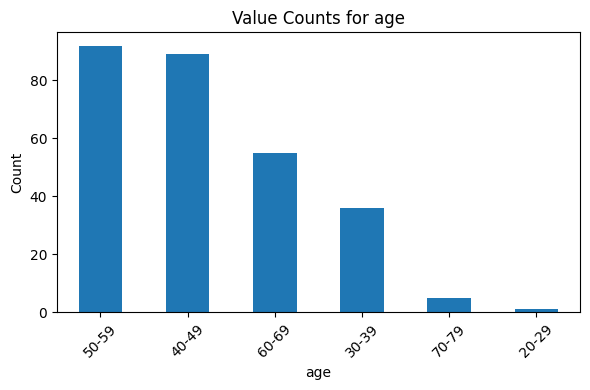

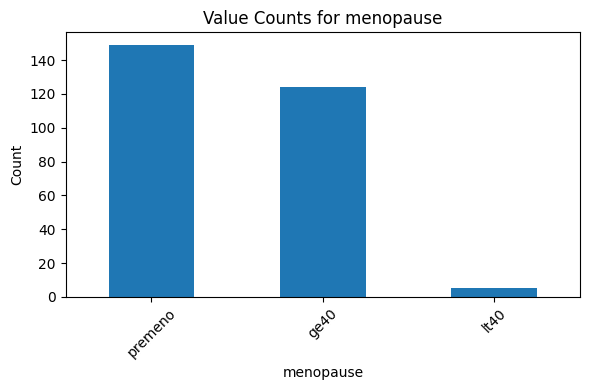

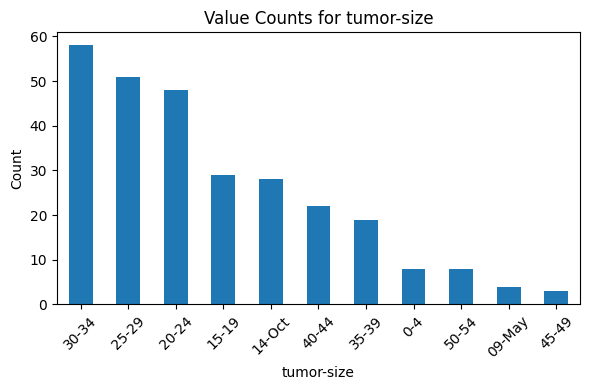

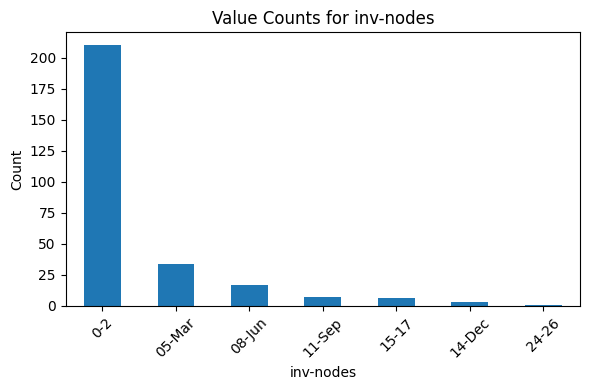

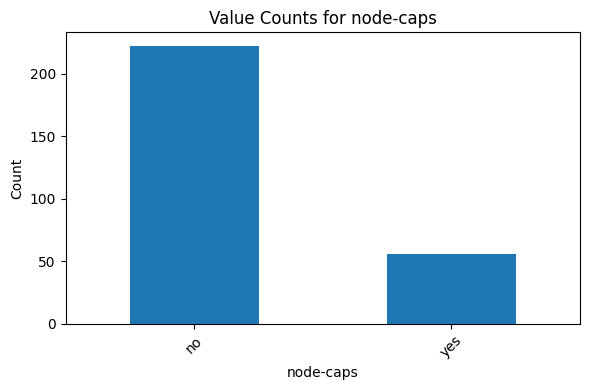

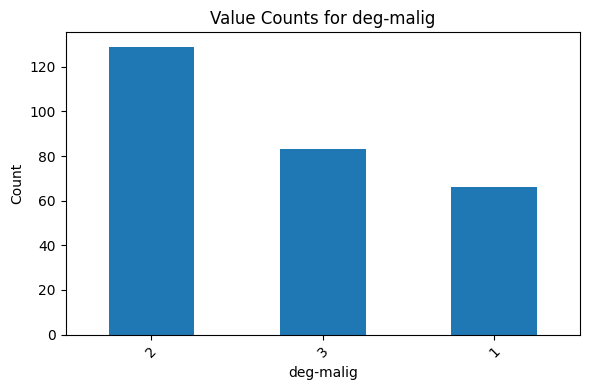

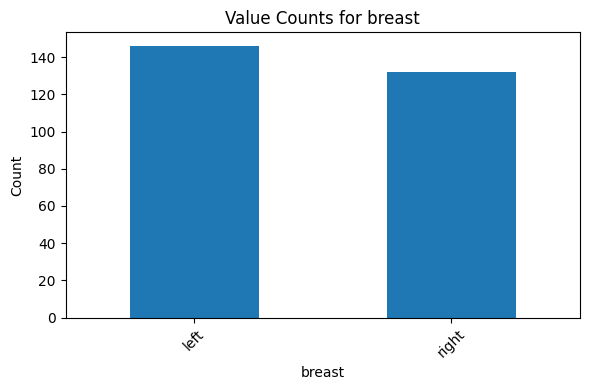

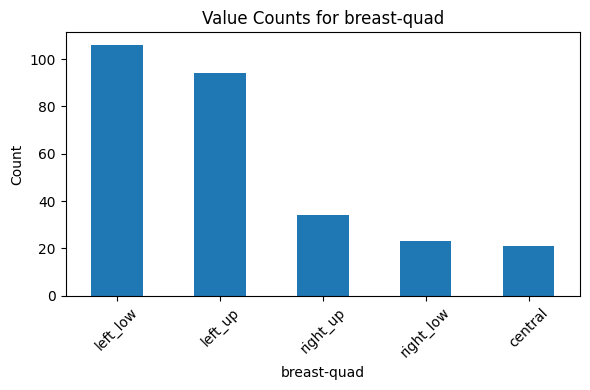

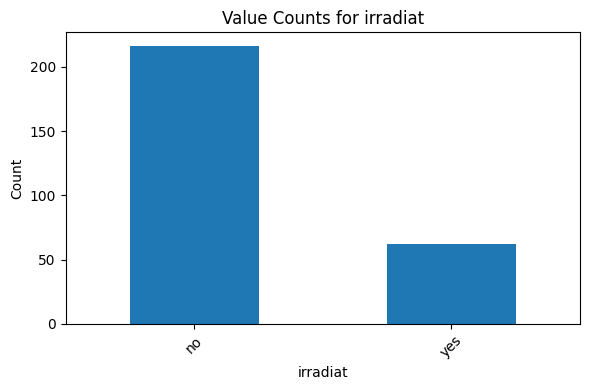

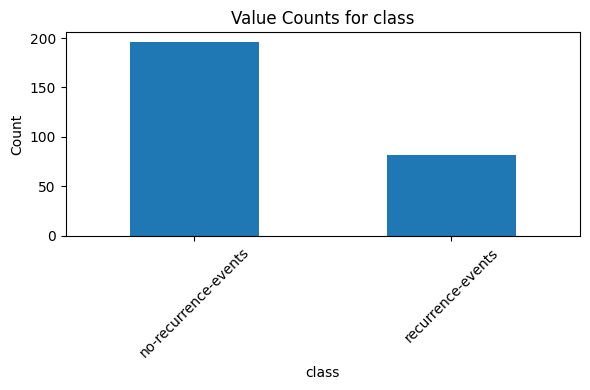

In [16]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Value Counts for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [32]:
df['class'].value_counts(normalize=True)


class
no-recurrence-events    0.705036
recurrence-events       0.294964
Name: proportion, dtype: float64

In [17]:
# Step 4: Encoding categorical variables using one-hot encoding for the following columns:
# age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat.
df_encoded = pd.get_dummies(df,  columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
df_encoded.head()


,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,...,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,no-recurrence-events,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


### Task 2: Logistic Regression Model Without Handling Class Imbalance

1. Split the dataset into training and test sets.
2. Train a Logistic Regression model using the training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [20]:
# Step 1: Split the dataset into training and test sets
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)


In [24]:
# Step 2: Train a Logistic Regression model using the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [31]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
class_report = classification_report(y_pred=y_pred,y_true=y_test)
print(class_report)
print("accuracy ", model.score(X_test, y_test))

                      precision    recall  f1-score   support

no-recurrence-events       0.71      0.90      0.80        39
   recurrence-events       0.43      0.18      0.25        17

            accuracy                           0.68        56
           macro avg       0.57      0.54      0.52        56
        weighted avg       0.63      0.68      0.63        56

accuracy  0.6785714285714286


### Task 3: Handling Class Imbalance Using Undersampling

1. Apply undersampling to balance the classes in the training data.
2. Train a Logistic Regression model using the undersampled training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [26]:
# Step 1: Apply undersampling to balance the classes in the training data
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [27]:
# Step 2: Train a Logistic Regression model using the undersampled training data
model_rus = LogisticRegression()
model_rus.fit(X_train_rus, y_train_rus)


LogisticRegression()

In [28]:
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_rus = model_rus.predict(X_test)
class_report_rus = classification_report(y_pred=y_pred_rus, y_true=y_test)
print(class_report_rus)



                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.67      0.71        39
   recurrence-events       0.41      0.53      0.46        17

            accuracy                           0.62        56
           macro avg       0.59      0.60      0.59        56
        weighted avg       0.66      0.62      0.64        56



### Task 4: Handling Class Imbalance Using SMOTE (Oversampling)

1. Apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [29]:
# Step 1: Apply SMOTE to balance the classes in the training data
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE-balanced training data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)


# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
y_pred_smote = model_smote.predict(X_test)
class_report_smote = classification_report(y_pred=y_pred_smote, y_true=y_test)
print(class_report_smote)

                      precision    recall  f1-score   support

no-recurrence-events       0.72      0.72      0.72        39
   recurrence-events       0.35      0.35      0.35        17

            accuracy                           0.61        56
           macro avg       0.54      0.54      0.54        56
        weighted avg       0.61      0.61      0.61        56



### Task 5: Handling Class Imbalance Using SMOTE Tomek Links

1. Apply SMOTE Tomek Links to balance the classes in the training data.
2. Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data.
3. Evaluate the model using a classification report, including precision, recall, and F1-score.

In [30]:
# Step 1: Apply SMOTE Tomek Links to balance the classes in the training data
tomek = SMOTETomek()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Step 2: Train a Logistic Regression model using the SMOTE Tomek Links-balanced training data
model_tomek = LogisticRegression()
model_tomek.fit(X_train_tomek, y_train_tomek)
y_pred_tomek = model_tomek.predict(X_test)
# Step 3: Evaluate the model using a classification report, including precision, recall, and F1-score
class_report_tomek = classification_report(y_pred=y_pred_tomek, y_true=y_test)
print(class_report_tomek)

                      precision    recall  f1-score   support

no-recurrence-events       0.78      0.64      0.70        39
   recurrence-events       0.42      0.59      0.49        17

            accuracy                           0.62        56
           macro avg       0.60      0.61      0.60        56
        weighted avg       0.67      0.62      0.64        56



### Conclusion

**Default Logistic Regression:**
- Accuracy: 0.68
- Recall on minor data:0.18 

**Logistic Regression with undersampling:**
- Accuracy: 0.62
- Recall on minor data:0.53
- Can clearly observe a major spike in recall on the minor data, however model is still not performing very well.

**SMOTE:**
- Accuracy: 0.65
- Recall on minor data:0.31
- Better recall than default LR, slightly worse accuracy. Overall - unusable.

**SMOTE Tomek Links:**
- Accuracy: 0.62
- Recall on minor data:0.59
- Overall the best when it comes to balancing the model out, with highest recall score. 


** Logistic Regression is interpretable but limited in capacity. In future work, Random Forest or XGBoost could be tested **